In [1]:
import numpy as np
import pandas as pd
import torch
import wandb
from torch.utils.data import DataLoader

import sys
sys.path.append('..')

from datasets import BrainFeaturesDataset
from models import SimpleMLP
from inference import enable_dropout

In [2]:
device = torch.device('cpu')
run_id = 'tjiagom/adni_phenotypes/2cxy59fk'
api = wandb.Api()
best_run = api.run(run_id)

# For SHAP's background
train_dataset = BrainFeaturesDataset('../data/adni_train_scaled_corrected.csv')

model = SimpleMLP(dim_in=train_dataset.X.shape[1], dropout_rate=best_run.config['dropout']).to(device)

restored_path = wandb.restore('simple_mlp.pt', run_path=run_id)
model.load_state_dict(torch.load(restored_path.name))
model.eval()

enable_dropout(model)

ukb_dataset = BrainFeaturesDataset('../data/ukb_scaled_corrected.csv', has_target=False, keep_ids=True)
ukb_loader = DataLoader(ukb_dataset, batch_size=200, shuffle=False)

Enabling dropout layer.


In [3]:
FEATURES_CORTICAL = ['thickness_bankssts_lh', 'thickness_caudalanteriorcingulate_lh',
                     'thickness_caudalmiddlefrontal_lh', 'thickness_cuneus_lh', 'thickness_entorhinal_lh',
                     'thickness_fusiform_lh', 'thickness_inferiorparietal_lh', 'thickness_inferiortemporal_lh',
                     'thickness_isthmuscingulate_lh', 'thickness_lateraloccipital_lh',
                     'thickness_lateralorbitofrontal_lh', 'thickness_lingual_lh', 'thickness_medialorbitofrontal_lh',
                     'thickness_middletemporal_lh', 'thickness_parahippocampal_lh', 'thickness_paracentral_lh',
                     'thickness_parsopercularis_lh', 'thickness_parsorbitalis_lh', 'thickness_parstriangularis_lh',
                     'thickness_pericalcarine_lh', 'thickness_postcentral_lh', 'thickness_posteriorcingulate_lh',
                     'thickness_precentral_lh', 'thickness_precuneus_lh', 'thickness_rostralanteriorcingulate_lh',
                     'thickness_rostralmiddlefrontal_lh', 'thickness_superiorfrontal_lh',
                     'thickness_superiorparietal_lh', 'thickness_superiortemporal_lh', 'thickness_supramarginal_lh',
                     'thickness_frontalpole_lh', 'thickness_temporalpole_lh', 'thickness_transversetemporal_lh',
                     'thickness_insula_lh', 'thickness_bankssts_rh', 'thickness_caudalanteriorcingulate_rh',
                     'thickness_caudalmiddlefrontal_rh', 'thickness_cuneus_rh', 'thickness_entorhinal_rh',
                     'thickness_fusiform_rh', 'thickness_inferiorparietal_rh', 'thickness_inferiortemporal_rh',
                     'thickness_isthmuscingulate_rh', 'thickness_lateraloccipital_rh',
                     'thickness_lateralorbitofrontal_rh', 'thickness_lingual_rh', 'thickness_medialorbitofrontal_rh',
                     'thickness_middletemporal_rh', 'thickness_parahippocampal_rh', 'thickness_paracentral_rh',
                     'thickness_parsopercularis_rh', 'thickness_parsorbitalis_rh', 'thickness_parstriangularis_rh',
                     'thickness_pericalcarine_rh', 'thickness_postcentral_rh', 'thickness_posteriorcingulate_rh',
                     'thickness_precentral_rh', 'thickness_precuneus_rh', 'thickness_rostralanteriorcingulate_rh',
                     'thickness_rostralmiddlefrontal_rh', 'thickness_superiorfrontal_rh',
                     'thickness_superiorparietal_rh', 'thickness_superiortemporal_rh', 'thickness_supramarginal_rh',
                     'thickness_frontalpole_rh', 'thickness_temporalpole_rh', 'thickness_transversetemporal_rh',
                     'thickness_insula_rh']

FEATURES_VOLUME = ['volume_bankssts_lh', 'volume_caudalanteriorcingulate_lh', 'volume_caudalmiddlefrontal_lh',
                   'volume_cuneus_lh', 'volume_entorhinal_lh', 'volume_fusiform_lh', 'volume_inferiorparietal_lh',
                   'volume_inferiortemporal_lh', 'volume_isthmuscingulate_lh', 'volume_lateraloccipital_lh',
                   'volume_lateralorbitofrontal_lh', 'volume_lingual_lh', 'volume_medialorbitofrontal_lh',
                   'volume_middletemporal_lh', 'volume_parahippocampal_lh', 'volume_paracentral_lh',
                   'volume_parsopercularis_lh', 'volume_parsorbitalis_lh', 'volume_parstriangularis_lh',
                   'volume_pericalcarine_lh', 'volume_postcentral_lh', 'volume_posteriorcingulate_lh',
                   'volume_precentral_lh', 'volume_precuneus_lh', 'volume_rostralanteriorcingulate_lh',
                   'volume_rostralmiddlefrontal_lh', 'volume_superiorfrontal_lh', 'volume_superiorparietal_lh',
                   'volume_superiortemporal_lh', 'volume_supramarginal_lh', 'volume_frontalpole_lh',
                   'volume_temporalpole_lh', 'volume_transversetemporal_lh', 'volume_insula_lh', 'volume_bankssts_rh',
                   'volume_caudalanteriorcingulate_rh', 'volume_caudalmiddlefrontal_rh', 'volume_cuneus_rh',
                   'volume_entorhinal_rh', 'volume_fusiform_rh', 'volume_inferiorparietal_rh',
                   'volume_inferiortemporal_rh', 'volume_isthmuscingulate_rh', 'volume_lateraloccipital_rh',
                   'volume_lateralorbitofrontal_rh', 'volume_lingual_rh', 'volume_medialorbitofrontal_rh',
                   'volume_middletemporal_rh', 'volume_parahippocampal_rh', 'volume_paracentral_rh',
                   'volume_parsopercularis_rh', 'volume_parsorbitalis_rh', 'volume_parstriangularis_rh',
                   'volume_pericalcarine_rh', 'volume_postcentral_rh', 'volume_posteriorcingulate_rh',
                   'volume_precentral_rh', 'volume_precuneus_rh', 'volume_rostralanteriorcingulate_rh',
                   'volume_rostralmiddlefrontal_rh', 'volume_superiorfrontal_rh', 'volume_superiorparietal_rh',
                   'volume_superiortemporal_rh', 'volume_supramarginal_rh', 'volume_frontalpole_rh',
                   'volume_temporalpole_rh', 'volume_transversetemporal_rh', 'volume_insula_rh']

FEATURES_VOLUME_EXTRA = ['volume_Left-Cerebellum-White-Matter', 'volume_Left-Cerebellum-Cortex',
                         'volume_Left-Thalamus-Proper', 'volume_Left-Caudate', 'volume_Left-Putamen',
                         'volume_Left-Pallidum', 'volume_Brain-Stem', 'volume_Left-Hippocampus', 'volume_Left-Amygdala',
                         'volume_Left-Accumbens-area', 'volume_Right-Cerebellum-White-Matter',
                         'volume_Right-Cerebellum-Cortex', 'volume_Right-Thalamus-Proper', 'volume_Right-Caudate',
                         'volume_Right-Putamen', 'volume_Right-Pallidum', 'volume_Right-Hippocampus',
                         'volume_Right-Amygdala', 'volume_Right-Accumbens-area']

In [4]:
reported_AD_at_scan = [1383275, 2114880, 5821545, 1471348, 4527724]
reported_PD_at_scan = [1532621, 1617724, 1733101, 1901760, 1925689, 2013553, 2106457,
       2275507, 2292257, 2327800, 2357487, 2491460, 2631110, 2718684,
       2869750, 2917693, 3033122, 3047828, 3157620, 3204408, 3273184,
       3318498, 3542965, 3549084, 3575461, 3696225, 4061219, 4170625,
       4265867, 4527724, 4654041, 5317140, 5723283, 5765412, 5892488,
       2718684]
latest_output_df = pd.read_csv('../results/latest_output.csv', index_col=0)
disease_info_df = pd.read_csv('../data/ukb_diagnosis.csv', index_col=0)
joined_df = latest_output_df.join(disease_info_df, how='inner')

only_controls = latest_output_df[~latest_output_df.index.isin(joined_df.index)]
people_ad_later = joined_df[joined_df.diag_icd10 == 'AD']
people_ad_later = people_ad_later[~people_ad_later.index.isin(reported_AD_at_scan)]
people_ad_later = people_ad_later[~people_ad_later.index.isin(reported_PD_at_scan)]
people_ad_later

certain_controls = only_controls[(only_controls['mean'] < 0.5) & (only_controls['std'] < 0.1)]
certain_controls_predicted = only_controls[(only_controls['mean'] > 0.5) & (only_controls['std'] < 0.1)]


## SHAP definitions

In [5]:
import shap

In [16]:
shap.DeepExplainer

shap.explainers._deep.Deep

In [102]:
e = shap.DeepExplainer(model, torch.tensor(train_dataset.X).to(device))
enable_dropout(model) # DeepExplainer calls model.eval() inside

In [39]:
def show_summary_plot(ids, mc_passes=50):
    X_tmp = np.array([ukb_dataset.X[i] for i, elem in enumerate(ukb_dataset.ids) if elem in ids])

    shap_values = []
    for i in range(mc_passes):
        tmp_shap = e.shap_values(torch.tensor(X_tmp).to(device))
        shap_values.append(tmp_shap[np.newaxis, :]) # shape: 1 X NUM_IDS (14) X NUM_FEATS(155)
    
    shap_values = np.mean(np.concatenate(shap_values), axis=0)
    shap.summary_plot(shap_values, X_tmp, feature_names=(FEATURES_CORTICAL + FEATURES_VOLUME + FEATURES_VOLUME_EXTRA))

## Summary Plots for different groups

Predictions on people with AD


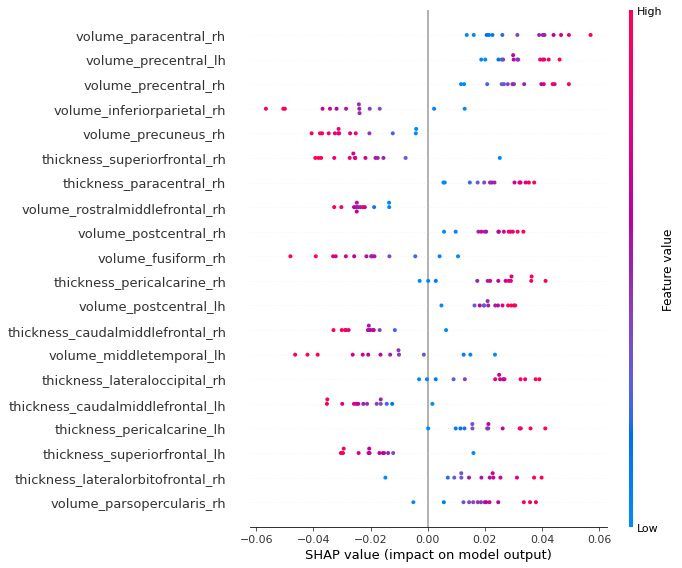

CPU times: user 2min 11s, sys: 6.46 s, total: 2min 18s
Wall time: 17.7 s


In [36]:
%%time
print('Predictions on people with AD')
show_summary_plot(joined_df[joined_df.diag_icd10 == 'AD'].index.values)

Controls with predicted mean > 0.5 and std < 0.1


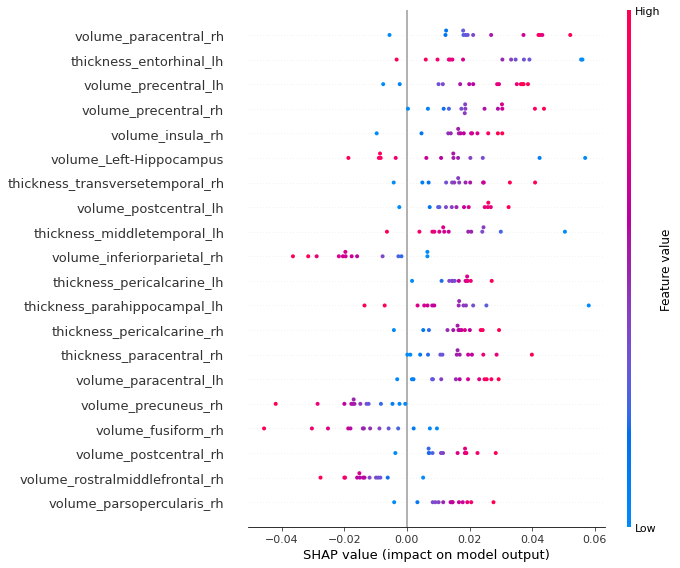

CPU times: user 2min 11s, sys: 6.71 s, total: 2min 18s
Wall time: 17.7 s


In [37]:
%%time
print('Controls with predicted mean > 0.5 and std < 0.1')
show_summary_plot(certain_controls_predicted.index.values)

Controls with predicted mean < 0.5 and std < 0.1


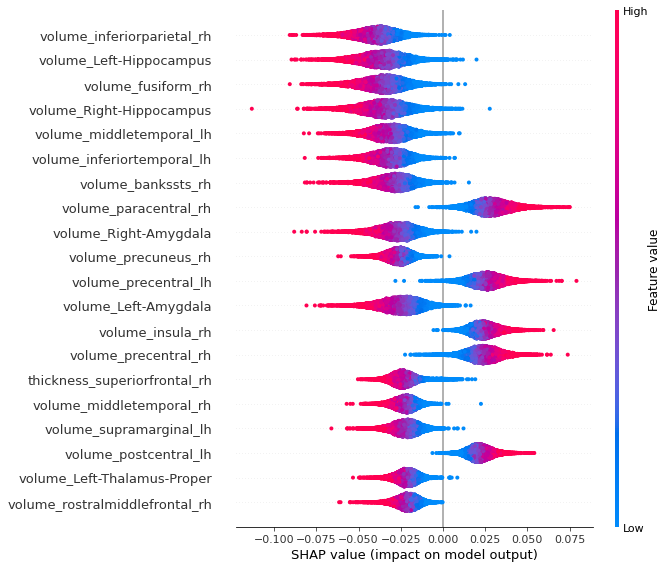

CPU times: user 1h 35min 20s, sys: 4min 40s, total: 1h 40min 1s
Wall time: 12min 31s


In [41]:
%%time
print('Controls with predicted mean < 0.5 and std < 0.1')
show_summary_plot(certain_controls.index.values, mc_passes=3) # Had ro reduce number of forward passes because of SHAP takes too long for all the certain_controls

## Checking a single person

Issue: Output value in plot doesn't correspond to when I manually generate the output's model... 

Doesn't seem to be the averaging across forward passes, as by just using a single pass it still seems a bit off.

In any case, there's a trend on outputing a value closer to 1 or to 0 according to probability.

I have tried to disable the output at inference and there's still a mismatch from the plot to the output

In [80]:
ids = joined_df[joined_df.diag_icd10 == 'AD'].index.values
X_tmp = np.array([ukb_dataset.X[i] for i, elem in enumerate(ukb_dataset.ids) if elem in ids])
shap_values = []
for i in range(50):
    tmp_shap = e.shap_values(torch.tensor(X_tmp).to(device))
    shap_values.append(tmp_shap[np.newaxis, :]) # shape: 1 X NUM_IDS (14) X NUM_FEATS(155)

shap_values = np.mean(np.concatenate(shap_values), axis=0)
#shap.summary_plot(shap_values, X_tmp, feature_names=(FEATURES_CORTICAL + FEATURES_VOLUME + FEATURES_VOLUME_EXTRA))

In [48]:
X_ids = [elem for elem in ukb_dataset.ids if elem in ids]
X_ids

[1174643,
 1383275,
 1471348,
 1502601,
 1878467,
 1971804,
 2511898,
 2718684,
 4199832,
 4652621,
 4747402,
 5276835,
 5382091,
 5821545]

In [49]:
id_where = np.where(np.array(X_ids) == 2511898)
id_where[0][0]

6

In [108]:
#X_tmp[id_where].shape
shap.initjs()
shap.force_plot(e.expected_value, shap_values[6,:], X_tmp[6,:], feature_names=(FEATURES_CORTICAL + FEATURES_VOLUME + FEATURES_VOLUME_EXTRA))#, matplotlib=True)

In [107]:
# 4199832
shap_values = e.shap_values(torch.tensor(X_tmp).to(device))
shap.force_plot(e.expected_value, shap_values[8,:], X_tmp[8,:], feature_names=(FEATURES_CORTICAL + FEATURES_VOLUME + FEATURES_VOLUME_EXTRA))#, matplotlib=True)

In [56]:
joined_df[joined_df.diag_icd10 == 'AD'].sort_values(by='mean')

,mean,std,diag_icd10
2511898,0.090066,0.099041,AD
1971804,0.091417,0.122653,AD
1502601,0.256988,0.205914,AD
1878467,0.553134,0.269960,AD
5276835,0.555365,0.245567,AD
1471348,0.616532,0.231237,AD
5821545,0.727666,0.236419,AD
1383275,0.737736,0.246617,AD
2718684,0.739687,0.256052,AD
4652621,0.795463,0.230180,AD
